In [2]:
import itertools

import matplotlib.pyplot as plt
import seaborn as sns

from utils import (
    FIGDIR,
    AdjacencyMethod,
    DistanceTransformation,
    Normalizer,
    get_dataset_filename,
    setup_plotting,
)

setup_plotting()

GROUP_COLUMNS = [
    f"{metric_name}_{group_name}"
    for (metric_name, group_name) in itertools.product(
        ["avg_katz", "avg_closeness", "avg_betweenness", "avg_laplacian"],
        ["low", "medium", "high"],
    )
]

In [3]:
event_filename = "all.txt"
input_data = use_threshold = False
transformation = DistanceTransformation.NONE
nomralization = Normalizer.NONE
adjacency_method = AdjacencyMethod.MANHATTAN

dataset_conf = get_dataset_filename(
    event_filename,
    input_data,
    use_threshold,
)

best_conf = dataset_conf[
    (dataset_conf["transformation"] == transformation.value)
    & (dataset_conf["normalization"] == nomralization.value)
    & (dataset_conf["adjacency_method"] == adjacency_method.value)
].reset_index(drop=True)

In [4]:
plot_df = (
    best_conf[GROUP_COLUMNS]
    .melt(
        var_name="metric_group",
        value_name="value",
    )
    .assign(
        metric=lambda df: df["metric_group"].apply(
            lambda x: "_".join(x.split("_")[:-1])
        ),
        group=lambda df: df["metric_group"].apply(lambda x: x.split("_")[-1]),
    )
)

In [5]:
plot_df

,metric_group,value,metric,group
0,avg_katz_low,0.105603,avg_katz,low
1,avg_katz_low,0.110201,avg_katz,low
2,avg_katz_low,0.115112,avg_katz,low
3,avg_katz_low,0.157509,avg_katz,low
4,avg_katz_low,0.156393,avg_katz,low
...,...,...,...,...
403,avg_laplacian_high,0.000243,avg_laplacian,high
404,avg_laplacian_high,0.015707,avg_laplacian,high
405,avg_laplacian_high,0.041759,avg_laplacian,high
406,avg_laplacian_high,0.000116,avg_laplacian,high


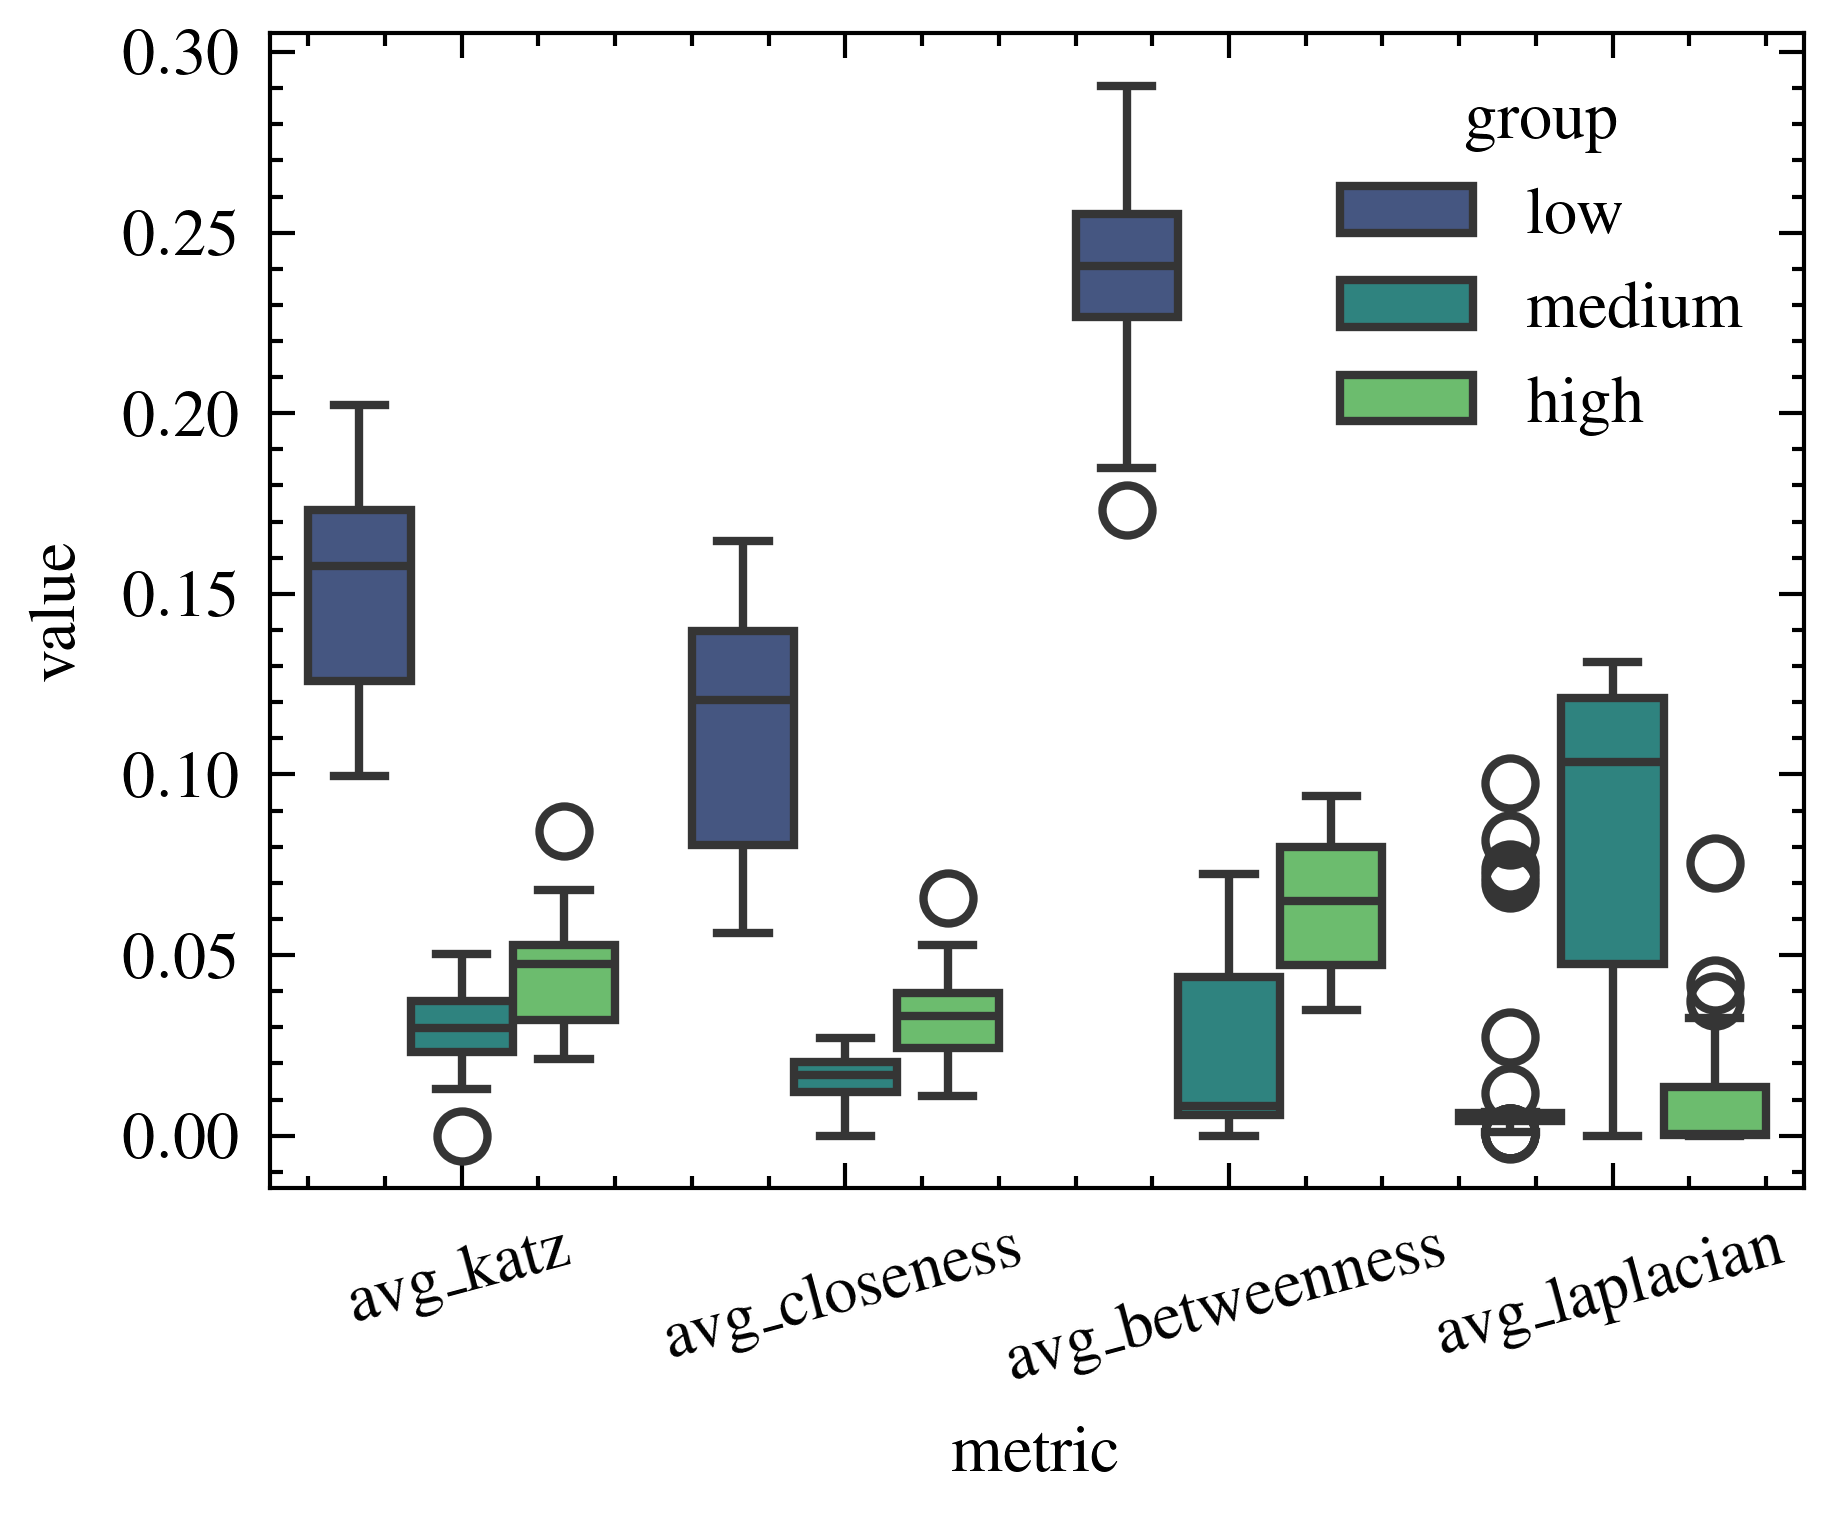

In [15]:
sns.boxplot(data=plot_df, x="metric", y="value", hue="group", palette="viridis")
plt.xticks(rotation=15)
plt.savefig(FIGDIR / "plots_per_cutoff_group.png", format="png", dpi=300)
plt.show()